In [1]:
import os, re, datetime, sys, getopt, fnmatch, time, codecs
from os.path import exists



In [2]:
from gensim import corpora
from pprint import pprint
from gensim.utils import simple_preprocess
from smart_open import smart_open

In [6]:
class ReadTxtFiles(object):
    def __init__(self, dirname):
        self.dirname = dirname
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            try:
                for line in open(os.path.join(self.dirname, fname), encoding='utf-8'):
                    yield simple_preprocess(line)
            except:
                print("sdv")

In [7]:
dictionary = corpora.Dictionary((ReadTxtFiles("../BBC_reading/all_texts")))

sdv


In [11]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

In [12]:
txts3 = [i for i in ReadTxtFiles("../BBC_reading/all_texts") if i]
txts3
print(txts3[0:5])

[['за', 'словами', 'міністра', 'інфраструктури', 'державному', 'бюджеті', 'не', 'вистачить', 'грошей', 'щоб', 'рятувати', 'кожне', 'підприємство'], ['українській', 'авіації', 'знадобиться', 'півтора', 'два', 'роки', 'щоб', 'збільшити', 'пасажиропотік', 'до', 'того', 'рівня', 'яким', 'він', 'був', 'до', 'карантину', 'заявив', 'міністр', 'інфраструктури', 'владислав', 'криклій', 'при', 'цьому', 'за', 'його', 'словами', 'для', 'того', 'щоб', 'відновити', 'всі', 'підприємства', 'потрібні', 'спеціальні', 'програми'], ['наші', 'прогнози', 'якщо', 'червні', 'почнемо', 'потроху', 'відновлюватися', 'то', 'до', 'кінця', 'року', 'вийдемо', 'приблизно', 'на', 'половину', 'того', 'пасажиропотоку', 'який', 'був', 'раніше', 'але', 'взагалі', 'авіація', 'інерційна', 'тому', 'ми', 'десь', 'півтора', 'два', 'роки', 'будемо', 'повертатися', 'до', 'орієнтовно', 'того', 'трафіку', 'пасажирів', 'до', 'якого', 'прийшли', 'повідомив', 'криклій', 'під', 'час', 'онлайн', 'зустрічі', 'european', 'business', 'ass

In [13]:
txts3

[['за',
  'словами',
  'міністра',
  'інфраструктури',
  'державному',
  'бюджеті',
  'не',
  'вистачить',
  'грошей',
  'щоб',
  'рятувати',
  'кожне',
  'підприємство'],
 ['українській',
  'авіації',
  'знадобиться',
  'півтора',
  'два',
  'роки',
  'щоб',
  'збільшити',
  'пасажиропотік',
  'до',
  'того',
  'рівня',
  'яким',
  'він',
  'був',
  'до',
  'карантину',
  'заявив',
  'міністр',
  'інфраструктури',
  'владислав',
  'криклій',
  'при',
  'цьому',
  'за',
  'його',
  'словами',
  'для',
  'того',
  'щоб',
  'відновити',
  'всі',
  'підприємства',
  'потрібні',
  'спеціальні',
  'програми'],
 ['наші',
  'прогнози',
  'якщо',
  'червні',
  'почнемо',
  'потроху',
  'відновлюватися',
  'то',
  'до',
  'кінця',
  'року',
  'вийдемо',
  'приблизно',
  'на',
  'половину',
  'того',
  'пасажиропотоку',
  'який',
  'був',
  'раніше',
  'але',
  'взагалі',
  'авіація',
  'інерційна',
  'тому',
  'ми',
  'десь',
  'півтора',
  'два',
  'роки',
  'будемо',
  'повертатися',
  'до',


In [21]:
from gensim.models import phrases
bigram = phrases.Phrases(txts3, min_count=50)
print(txts3[1], bigram[txts3[1]])

['українській', 'авіації', 'знадобиться', 'півтора', 'два', 'роки', 'щоб', 'збільшити', 'пасажиропотік', 'до', 'того', 'рівня', 'яким', 'він', 'був', 'до', 'карантину', 'заявив', 'міністр', 'інфраструктури', 'владислав', 'криклій', 'при', 'цьому', 'за', 'його', 'словами', 'для', 'того', 'щоб', 'відновити', 'всі', 'підприємства', 'потрібні', 'спеціальні', 'програми'] ['українській', 'авіації', 'знадобиться', 'півтора', 'два_роки', 'щоб', 'збільшити', 'пасажиропотік', 'до', 'того', 'рівня', 'яким', 'він', 'був', 'до', 'карантину', 'заявив', 'міністр', 'інфраструктури', 'владислав', 'криклій', 'при_цьому', 'за', 'його_словами', 'для', 'того_щоб', 'відновити', 'всі', 'підприємства', 'потрібні', 'спеціальні', 'програми']


In [34]:
bitxts = [bigram[line] for line in txts3]
model4 = Word2Vec(txts3, min_count=10)

w2c = dict()
for item in model4.wv.vocab:
    w2c[item]=model4.wv.vocab[item].count

In [76]:
w2c = dict()
for item in model4.wv.vocab:
    w2c[item]=model4.wv.vocab[item].count
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
del w2cSorted['на']
k = {'та','що','не','image','caption','sport','new','до','усі','матеріали','сайті','обов','будь','україни','інтерфакс','новини','zn','ua','для','це','як','за','ua','також','про' ,'які', 'від','або','цьому','без','але'}
for i in k :
    del w2cSorted[i]
w2cSorted

{'україна': 7127,
 'він': 3343,
 'умови': 3123,
 'час': 3033,
 'україні': 2998,
 'якій': 2969,
 'компаній': 2939,
 'використання': 2932,
 'першому': 2926,
 'року': 2869,
 'систем': 2869,
 'посиланням': 2869,
 'інтернет': 2852,
 'агентство': 2842,
 'матеріалів': 2831,
 'агентства': 2828,
 'його': 2825,
 'формі': 2822,
 'наступному': 2812,
 'під': 2791,
 'підлягають': 2777,
 'посилання': 2774,
 'дозволу': 2772,
 'правах': 2769,
 'язкове': 2766,
 'відкрите': 2759,
 'розташовані': 2759,
 'конкретний': 2756,
 'розповсюдженню': 2754,
 'реклами': 2754,
 'дозволяється': 2753,
 'пряме': 2751,
 'видань': 2750,
 'пошукових': 2750,
 'блоці': 2750,
 'абзаці': 2747,
 'письмового': 2747,
 'публікуються': 2747,
 'гіперпосилання': 2746,
 'матерал': 2746,
 'відтворенню': 2746,
 'квітня': 2701,
 'коронавірус': 2677,
 'ми': 2584,
 'через': 2576,
 'вже': 2450,
 'коронавірусу': 2379,
 'буде': 2357,
 'те': 2304,
 'копирайт': 2294,
 'изображения': 2294,
 'по': 2251,
 'людей': 2232,
 'може': 2151,
 'березня': 

In [77]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

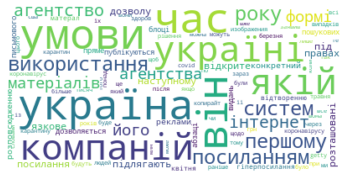

In [74]:
l = list()
for i in w2cSorted.keys():
    l.append(i)   
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(l).replace("'", ""))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [68]:
w2cSorted['image']

1395